In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kumaraswamy import kumaraswamy

data = pd.read_csv('D:/HomeWork/Pattern/inputs/P4/kumaraswamy.txt',header = None)
data = data.values

X = []
Y = []
Z = []

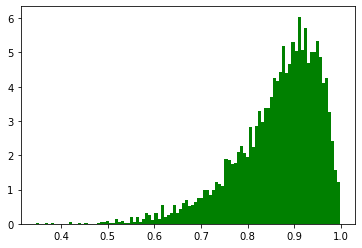

In [2]:
plt.hist(data, 100,   density = 1, color ='green')
plt.show()

In [4]:
for x in np.arange(0.1,13,1):
    for y in np.arange(0.1,13,1):
        X.append(x)
        Y.append(y)
        result = 0
        dis = kumaraswamy(x,y)
        for i in data:
            result += np.log(dis.pdf(i))
        Z.append(result)
        
maxIndex = Z.index(max(Z))+1
a = X[maxIndex]
b = Y[maxIndex]
likelihood_log = Z[maxIndex]
print("a is : " , a)
print("b is : " , b)
print("log of likelihood is :" , likelihood_log)

a is :  10.1
b is :  2.1
log of likelihood is : [5188.20809425]


In [5]:
import scipy.optimize as opt
import scipy.stats as st
import numpy as np
def kumaraswamy_logL(log_par, data):
    N = len(data)
    a,b = np.exp(log_par)
    logL = N*np.log(a*b) + (a-1)*np.sum(np.log(data)) + (b-1)*np.sum(np.log(1-np.power(data, a)))
    return logL


def kumaraswamy_mle(data):
    res = opt.minimize(
    fun=lambda log_params, data: -kumaraswamy_logL(log_params, data),
    x0=np.array([0.5, 0.5]), args=(data,), method='BFGS')
    a,b = np.exp(res.x)
    return a,b

def kumaraswamy_q(p, a, b):
    return np.power(1-np.power(1-p, 1/b), 1/a)

a,b = kumaraswamy_mle(data)
a,b

(9.878099193289172, 2.0208964972958867)

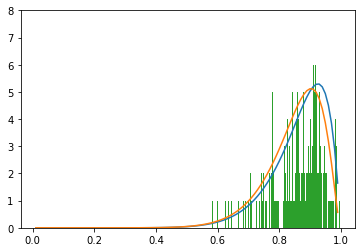

In [6]:
def kumaraswamy(a,b,x):
    return a*b*((x)**(a-1))*((1-x**a)**(b-1))

r = list(np.arange(0.01,1,0.01))

[(lambda x: x*x)(x) for x in range(10)]

cal = [(lambda x: kumaraswamy(9.8780,2.020,x)) (x) for x in r] 
esti = [(lambda x: kumaraswamy(10.1,2.6,x))  (x) for x in r] 

plt.plot(r,cal)
plt.plot(r,esti)
plt.hist(data,len(data))
plt.ylim(0,8)
plt.show()